In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# set the random seed for reproducibility
numpy.random.seed(99)

In [3]:
mymean = 100
myscale = 1.0
# number of samples is 100
ns = 100

## Normal Distribution

Text(0.5,1,'Normal')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


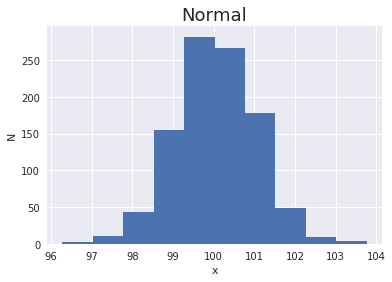

In [4]:
# make a histogram of a 1 dimensional array of 1000 normal distributed elements
pl.hist(np.random.normal(mymean, myscale, 1000))
pl.ylabel('N')
pl.xlabel('x')
pl.title('Normal', fontsize = 18)

##### Figure 1: Standard Normal distribution: mean = 100, N = 1000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


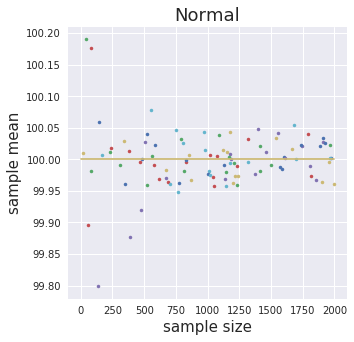

In [5]:
# create empty list for gaussian distribution samples
norm_list = []
# create samples with different sizes N
for i in range(ns):
    norm_sample = np.random.normal(mymean, myscale, np.random.rand() * 1990 + 10) # (N>10 & N<2000)
    norm_list.append(norm_sample)
# create an AxesSubplot with size 5,5 and 1x1 grid, first subplot
ax = pl.figure(figsize=(5,5)).add_subplot(111)
# plot gauss_list in ax
for item in norm_list:
    ax.set_xlabel('sample size', fontsize=15)
    ax.set_ylabel('sample mean', fontsize=15)
    ax.set_title('Normal', fontsize=18)
    ax.plot(len(item), item.mean(), '.')
# draw a line representing the mean
ax.plot([0,2000], [mymean,mymean], '-')

##### figure 2: The distribution of means tend toward a normal distribution. This obey the law of large numbers or Central Limit Theorem. 

Text(0.5,1,'Normal')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


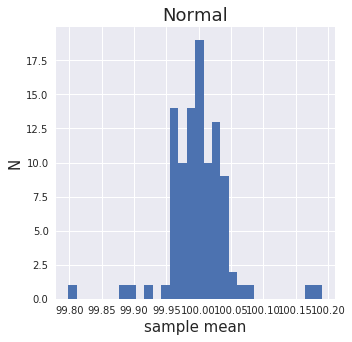

In [6]:
# store sample means
n_means = [item.mean() for item in norm_list]
# plot figure for all means
pl.figure(figsize=(5, 5))
pl.hist(n_means,bins=30)
pl.xlabel('sample mean', fontsize = 15)
pl.ylabel('N', fontsize = 15)
pl.title('Normal', fontsize = 18)

##### Figure 3: Distributions of all 100 sample means of Standard Normal Distribution 

## Chi-Squared Distribution

In [7]:
df = mymean #the number of degrees of freedom

Text(0.5,1,'Chi-squared')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


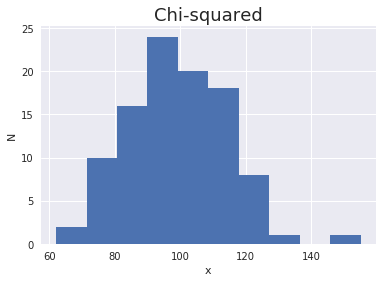

In [8]:
pl.hist(np.random.chisquare(df, size=100))
pl.ylabel('N')
pl.xlabel('x')
pl.title('Chi-squared', fontsize = 18)

##### Figure 4: Chi sq distribution: df = 100, N=100

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


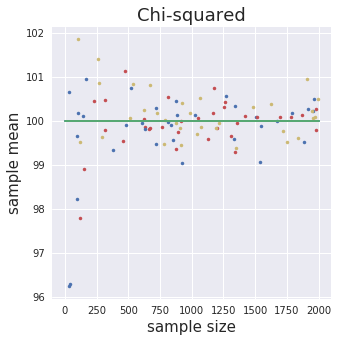

In [12]:
chi_list = []
for i in range(ns):
    chi_sample = np.random.chisquare(df, np.random.rand()*1990+10)
    chi_list.append(chi_sample)
ax_chi = pl.figure(figsize=(5,5)).add_subplot(111)
for item in chi_list:
    ax_chi.set_xlabel('sample size', fontsize=15)
    ax_chi.set_ylabel('sample mean', fontsize=15)
    ax_chi.set_title('Chi-squared', fontsize=18)
    ax_chi.plot(len(item), item.mean(), '.')
    ax_chi.plot([0,2000], [df, df], '-')

##### Figure 5: 100 Sample of Chi-squared Distribution (sample mean against sample size). The distribution of means tend toward a normal distribution. This obey the law of large numbers or Central Limit Theorem.

Text(0.5,1,'Chi-squared')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


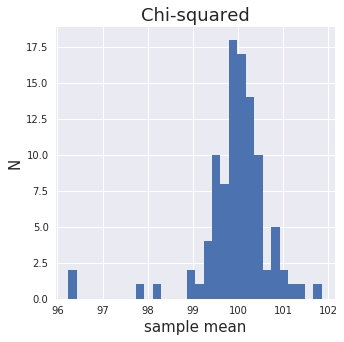

In [13]:
c_means = [item.mean() for item in chi_list]
# plot figure for all means
pl.figure(figsize=(5, 5))
pl.hist(c_means,bins=30)
pl.xlabel('sample mean', fontsize = 15)
pl.ylabel('N', fontsize = 15)
pl.title('Chi-squared', fontsize = 18)

##### Figure 6: Distributions of all 100 sample means of Chi-squared Distribution

## Poisson Distribution

In [14]:
lamda = mymean # which is 100

Text(0.5,1,'Poisson')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


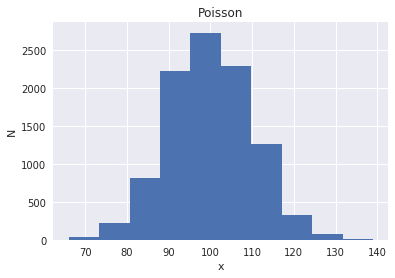

In [15]:
pl.hist(np.random.poisson(lamda, 10000))
pl.ylabel('N')
pl.xlabel('x')
pl.title('Poisson')

##### Figure 7: Poission Distribution: Lamda = 100, N = 1000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


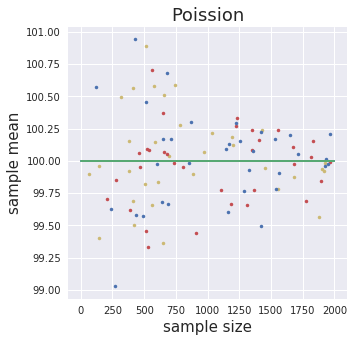

In [16]:
pois_list = []
for i in range(ns):
    pois_sample = np.random.poisson(lamda, np.random.rand()*1990+10)
    pois_list.append(pois_sample)
ax_pois = pl.figure(figsize=(5,5)).add_subplot(111)
for item in pois_list:
    ax_pois.set_xlabel('sample size', fontsize=15)
    ax_pois.set_ylabel('sample mean', fontsize=15)
    ax_pois.set_title('Poission', fontsize=18)
    ax_pois.plot(len(item), item.mean(), '.')
    ax_pois.plot([0,2000], [lamda, lamda], '-')

##### Figure 8: 100 Samples of Poission Distribution mean against sample size. The distribution of means looks like a normal standard distribution. This obey the law of large numbers or Central Limit Theorem

Text(0.5,1,'Poission')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


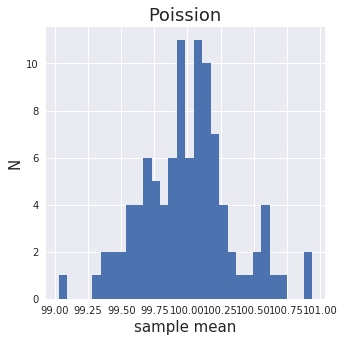

In [17]:
p_means = [item.mean() for item in pois_list]
pl.figure(figsize=(5, 5))
pl.hist(p_means,bins=30)
pl.xlabel('sample mean', fontsize = 15)
pl.ylabel('N', fontsize = 15)
pl.title('Poission', fontsize = 18)

##### Figure 9: Distributions of all 100 sample means of Poission Distribution 

## Binomial Distribution

Text(0.5,1,'Binomial')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


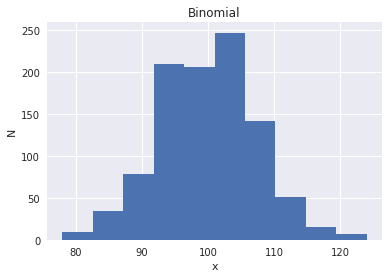

In [18]:
n, p = 200, .5  # number of trials, probability of each trial
pl.hist(np.random.binomial(n, p, 1000))
pl.ylabel('N')
pl.xlabel('x')
pl.title('Binomial')

##### Figure 10: Binomial Distribution: number of trials = 100, probability fo each trial = 0.5

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


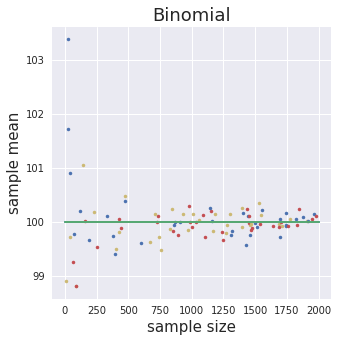

In [19]:
bino_list = []
for i in range(ns):
    bino_sample = np.random.binomial(n, p, np.random.rand()*1990+10)
    bino_list.append(bino_sample)
ax_bino = pl.figure(figsize=(5,5)).add_subplot(111)
for item in bino_list:
    ax_bino.set_xlabel('sample size', fontsize=15)
    ax_bino.set_ylabel('sample mean', fontsize=15)
    ax_bino.set_title('Binomial', fontsize=18)
    ax_bino.plot(len(item), item.mean(), '.')
    ax_bino.plot([0,2000], [n/2, n/2], '-')

##### Figure 11: 100 Samples of Binomial Distribution mean against sample size. The distribution of means looks like a normal standard distribution. This obey the law of large numbers or Central Limit Theorem. 

Text(0.5,1,'Binomial')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


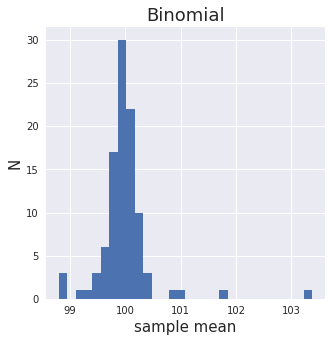

In [20]:
b_means = [item.mean() for item in bino_list]
pl.figure(figsize=(5, 5))
pl.hist(b_means,bins=30)
pl.xlabel('sample mean', fontsize = 15)
pl.ylabel('N', fontsize = 15)
pl.title('Binomial', fontsize = 18)

##### Figure 12: Distributions of all 100 sample means of Binomial Distribution

## Logistic Distribution

In [21]:
loc = mymean
scale = 1.0

Text(0.5,1,'Logistic')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


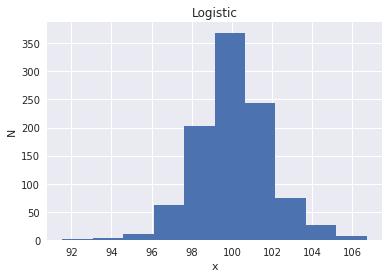

In [22]:
pl.hist(np.random.logistic(loc, scale, 1000))
pl.ylabel('N')
pl.xlabel('x')
pl.title('Logistic')

##### Figure 13: Logistic Distribution: loc = 100, scale = 1.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


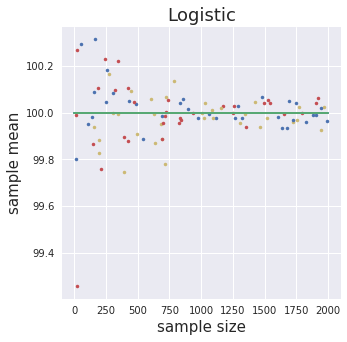

In [23]:
logi_list = []
for i in range(ns):
    logi_sample = np.random.logistic(loc, scale, np.random.rand()*1990+10)
    logi_list.append(logi_sample)
ax_logi = pl.figure(figsize=(5,5)).add_subplot(111)
for item in logi_list:
    ax_logi.set_xlabel('sample size', fontsize=15)
    ax_logi.set_ylabel('sample mean', fontsize=15)
    ax_logi.set_title('Logistic', fontsize=18)
    ax_logi.plot(len(item), item.mean(), '.')
    ax_logi.plot([0,2000], [loc, loc], '-')

##### Figure 14: 100 Samples of Logistic Distribution mean against sample size. The distribution of means looks like a normal standard distribution. This obey the law of large numbers or Central Limit Theorem.

Text(0.5,1,'Logistic')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


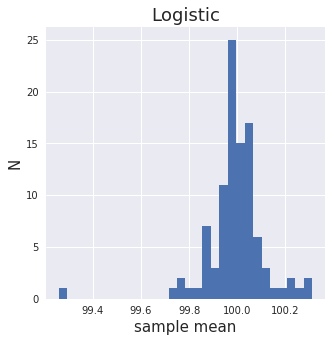

In [24]:
l_means = [item.mean() for item in logi_list]
pl.figure(figsize=(5, 5))
pl.hist(l_means,bins=30)
pl.xlabel('sample mean', fontsize = 15)
pl.ylabel('N', fontsize = 15)
pl.title('Logistic', fontsize = 18)

##### Figure 15: Distributions of all 100 sample means of Logistic Distribution

In [25]:
# join the means of all 5 distributions into one list
all_means = n_means + c_means + b_means + p_means + l_means

In [26]:
len(all_means)

500

Text(0.5,1,'All Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


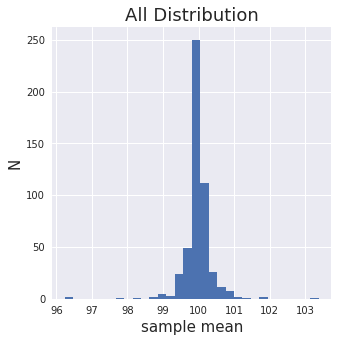

In [27]:
pl.figure(figsize=(5, 5))
pl.hist(all_means,bins=30)
pl.xlabel('sample mean', fontsize = 15)
pl.ylabel('N', fontsize = 15)
pl.title('All Distribution', fontsize = 18)

##### Figure 16: Means of all 5 distributions